In [48]:
# Imports
import glob
import numpy as np
import pandas as pd
import nibabel as nb
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pickle
import os
import h5py

In [62]:
# DATA PATHS. Please change this dependending on your dir for the code to run
# "/autofs/space/simba_001/users/PBR28_KOALA/data/PET/PBRKOA_HC019_01/PET/PET_60-90_SUV.nii.gz

USER = "leila" #change the user 
DATA_ROOT = "/autofs/space/simba_001/users/PBR28_KOALA/data/PET"
WORKING_PROCESSED_DATA_PATH = f"/autofs/space/celer_001/users/{USER}/working_pbr28"
PICKLE_SAVE_PATH = f"{WORKING_PROCESSED_DATA_PATH}/pickles"
IMAGE_DATA_SAVE_PATH = f"{WORKING_PROCESSED_DATA_PATH}/images"


os.makedirs(PICKLE_SAVE_PATH, exist_ok = True)
os.makedirs(WORKING_PROCESSED_DATA_PATH, exist_ok = True)
os.makedirs(IMAGE_DATA_SAVE_PATH, exist_ok = True)

In [55]:
ground_truth_niftys = glob.glob(f"{DATA_ROOT}/PBRKOA**/PET/PET_60-90_SUV.nii.gz")
ground_truth_patients = np.asarray([f.split("/")[8] for f in ground_truth_niftys])

#Save the patient arr to pickle file

with open(f"{PICKLE_SAVE_PATH}/unfiltered_patient_list.pkl" , "wb") as f:
    pickle.dump(ground_truth_patients, f)

In [64]:
ground_truths =  np.asarray([nb.load(f).get_fdata() for f in tqdm(ground_truth_niftys)])

  0%|          | 0/112 [00:00<?, ?it/s]

In [69]:
# Save the images and the patient labels

with h5py.File(f"{IMAGE_DATA_SAVE_PATH}/unfiltered_gts.h5py", "w") as f:
    f.create_dataset("pet-60-90_suv", data=ground_truths, dtype="float64")
    dt = h5py.special_dtype(vlen=str) 
    pat_ids = np.asarray(ground_truth_patients, dtype= dt)
    f.create_dataset("patient-ids", data=pat_ids)

## Sanity Check

In [77]:
# Sanity Check
gt = h5py.File(f"{IMAGE_DATA_SAVE_PATH}/unfiltered_gts.h5py", "r")
ground_truths_arr = np.asarray(gt['pet-60-90_suv'])
print(f"The shape of the gt tensor is {ground_truths_arr.shape}")

The shape of the gt tensor is (112, 344, 344, 127)


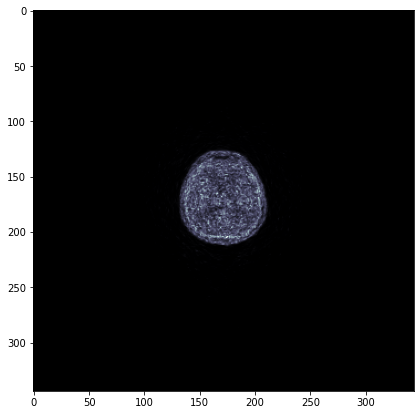

In [95]:
sample = 7
sliced = 80
plt.figure(figsize=(7,7))

image = np.rot90(ground_truths_arr[sample])
image_2d = image[:, :, sliced]
plt.imshow(image_2d, cmap='bone')
plt.show()